# Homework1 : Car Fuel


## Day 1 

## about this project

### Context
I am driving always the same car and i take almost always the same route. However, at the gas station i like to change the gas type; between SP98 (sold as "Super plus" sometimes) and SP95 E10 (This is, "super" gas with 10% Alcohol). E10 is sold for 1,38€; SP98 is sold for 1,46€; per liter.

From my feeling i would say that my car consumes a lot more with E10. From the data, what can we derive there? I challenge you to partial out the factor "E10 gas" and tell me how much my car really consumes more with it.

I applied my own basic linear regression on it and had as a result that it consumes 0.4 liters more with E10 gas. Linear regressions have the disadvantage that you can only really use them if the features are independent.

I challenge you to predict the consumption depending on the gas type!


### Content
Since a few months, i write down the data of my car's display after each ride; while regularly changing the gas type.

In the file, you will find the displayed distance (km); the consume (L/100km); the average speed (km/h), the temperature i had inside (°C), the temperature outside (°C), anything special that happened, if it was raining, if the air condition was on, if it was sunny enough that the car felt warm when i started it... and yes - the gas type i was using. I have also two columns saying how much and which gas type I was buying. Careful with those. The numbers don't add exactly up, because I note only the rides that occur under certain conditions: If the car was not cooling down enough to have another independent measure from the one before, i don't note it.

I started writing down the data in November, changed to SP98 in winter, and back to E10 in spring. Apart from that, the data is rather clean as i was doing my own project on it already.

### Acknowledgements
Thanks to Victor Chernozhukov who was planting this idea in my head, even if it took some years until i finally acted on it. :-)

### Inspiration
I was using a linear regression to partial out the influence of the gas type. The gas type is truly independent from the rest of the variables, so it should be possible without problem. However - depending on how i engineer the other features, the result is between 0.4 and 0.8 liters per 100km influence. A large, single-feature-depending difference usually is a hint for lots of covariance between the features; meaning in turn that linear regression might not be the best tool here.

In [112]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_flue = pd.read_csv("data/measurements.csv")

# Ignore refilled and special cases
df_flue = df_flue[df_flue['refill liters'].isna()]
df_flue = df_flue[df_flue['AC'] == 0]
df_flue = df_flue[df_flue['rain'] == 0]
df_flue = df_flue[df_flue['sun'] == 0]

# pickup numbers and gas_type
df_flue = df_flue.filter(items=['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'gas_type'])
for k in ["consume","temp_inside", "distance"]:
    df_flue[k] = df_flue[k].str.replace(",", ".").astype(float)

# calculate temperture difference between inside and outside
#df_flue["temp_diff"] = df_flue["temp_inside"] - df_flue["temp_outside"]

# Ignore na data and split to E10 and SP98
df_e10 = df_flue[df_flue['gas_type'].str.contains('E10')].dropna(how='any')
df_sp98 = df_flue[df_flue['gas_type'].str.contains('SP98')].dropna(how='any')

#df_e10["distance_per_euro"] =  df_e10["distance"] / (df_e10["consume"] * 1.38)

#df_sp98["distance_per_euro"] =  df_sp98["distance"] / (df_sp98["consume"] * 1.46)

# df_e10.describe()
df_sp98.describe()



,distance,consume,speed,temp_inside,temp_outside
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,17.055333,4.894667,40.566667,21.740000,11.393333
std,18.182692,1.083481,12.611605,1.077095,6.407731
min,1.300000,3.600000,20.000000,19.000000,-3.000000
25%,11.800000,4.225000,32.000000,21.500000,7.000000
50%,14.150000,4.700000,40.000000,22.000000,10.500000
75%,17.225000,5.200000,48.000000,22.000000,16.000000
max,211.000000,11.500000,82.000000,25.000000,30.000000


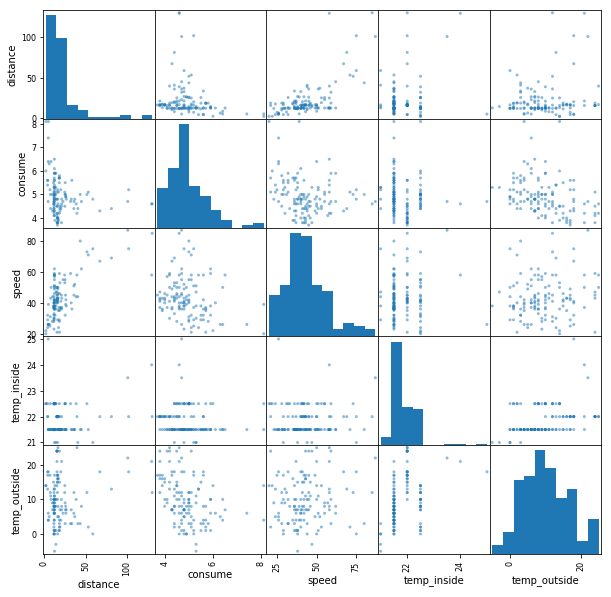

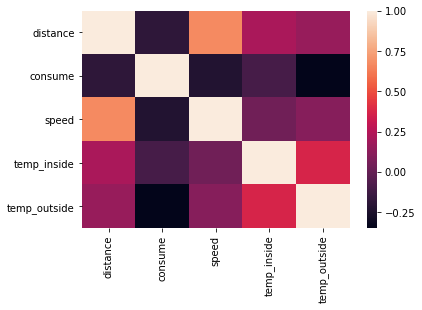

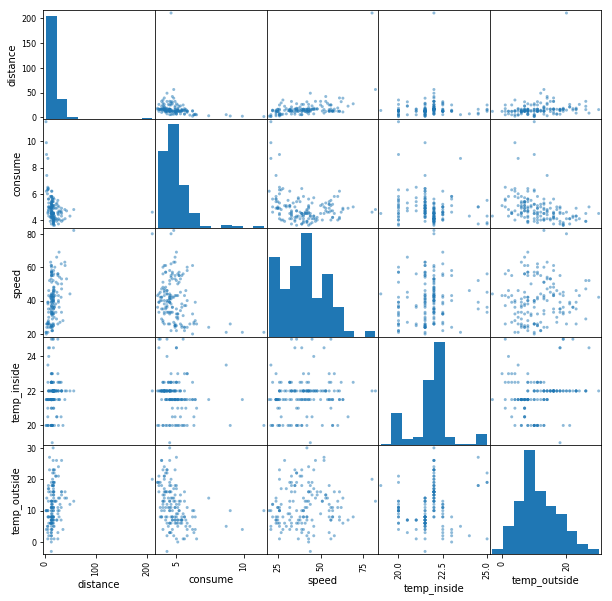

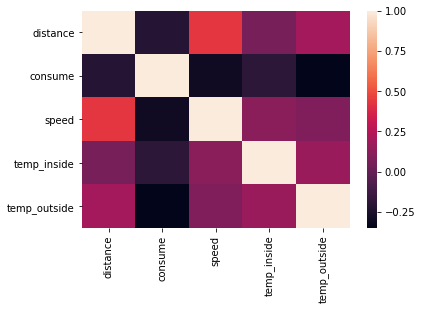

In [116]:
#display(df_e10.head(100))
pd.plotting.scatter_matrix(df_e10, figsize=(10,10))
plt.show()


sns.heatmap(df_e10.corr())
plt.show()

# display(df_sp98.head(100))
pd.plotting.scatter_matrix(df_sp98, figsize=(10,10))
plt.show()

sns.heatmap(df_sp98.corr())
plt.show()


E10 : w0 = 0.000, w1 = 2.991, 二乗誤差 = 30723.452
SP98 : w0 = 0.000, w1 = 2.160, 二乗誤差 = 27702.197


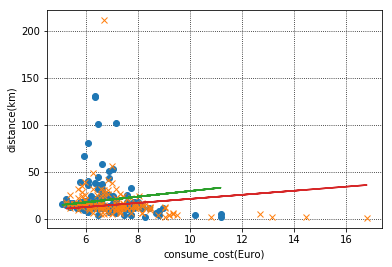

In [115]:
#e_x = df_e10["distance_per_euro"].values
#e_y = df_e10["temp_diff"].values
#s_x = df_sp98["distance_per_euro"].values
#s_y = df_sp98["temp_diff"].values

# more simply..
e_y = df_e10["distance"].values
e_x = df_e10["consume"].values  * 1.38
s_y = df_sp98["distance"].values
s_x = df_sp98["consume"].values * 1.46

e_X = e_x.reshape(-1,1)
s_X = s_x.reshape(-1,1)

regr = LinearRegression(fit_intercept=False)
regr.fit(e_X, e_y)
e_y_est_sklearn = regr.intercept_ + regr.coef_[0] * e_x
squared_error = 0.5 * np.sum( (e_y_est_sklearn - e_y) ** 2)
print("E10 : w0 = {:.3f}, w1 = {:.3f}, 二乗誤差 = {:.3f}".format(regr.intercept_, regr.coef_[0], squared_error))

regr = LinearRegression(fit_intercept=False)
regr.fit(s_X, s_y)

s_y_est_sklearn = regr.intercept_ + regr.coef_[0] * s_x
squared_error = 0.5 * np.sum( (s_y_est_sklearn - s_y) ** 2)
print("SP98 : w0 = {:.3f}, w1 = {:.3f}, 二乗誤差 = {:.3f}".format(regr.intercept_, regr.coef_[0], squared_error))

plt.plot(e_x, e_y, 'o')
plt.plot(s_x, s_y, 'x')
plt.xlabel("consume_cost(Euro)")
plt.ylabel("distance(km)")
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(e_X, e_y_est_sklearn)
plt.plot(s_X, s_y_est_sklearn)
plt.show()


# High Speed with low consume


211 km with 4.6 liters
```
$ cat data/measurements.csv  | grep 211
211,"4,6",80,22,20,,SP98,0,0,0,,
```

153.5 km with 4.9 liters
```
$ cat data/measurements.csv  | grep 82
"153,5","4,9",82,"21,5",3,rain,SP98,0,1,0,,
```

# strange log. No AC..
1.3 km with 11.5 liters
```
$ cat data/measurements.csv  | grep 11.5
"1,3","11,5",21,20,10,,SP98,0,0,0,,
```

```
distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
```

- Temperature?
- Split by distance?
